# FINAL YEAR PROJECT

## 1 Introduction

### 1.1 Background

### 1.2 Data Description

Dataset from https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy

**Info_Content.csv**

The content in Junyi Academy contains exercises, videos, and exams.
All the content in this dataset is in the type of exercise.

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the metadata and hierarchy structure of each exercise in Junyi Academy.
There are three difficulty settings for each content, which indicates how hard it is to learn the concept.
The learning stage is separated into three stages: Elementary, Junior, and Senior.

The exercises in Junyi Academy are organized in a tree-like structure.
The current dataset release has four levels in the hierarchy.

| Variable Name | Description |
|:-|:-|
| ucid | The hashed unique ID of the content. |
| content_pretty_name | The Chinese display name of this content. |
| content_kind | The kind of this content. The current dataset release only includes `Exercise` |
| difficulty | The difficulty of this content. There are four possible values: `Easy`, `Normal`, `Hard` and `Unset`. Unset means |
| learning stage | The subject of this content. The current dataset release only includes `math` |
| subject | The learning stage of this content. There are three possible values: `Elementary`, `Junior` and `Senior`. |
| level1_id | The hashed level 1 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level2_id | The hashed level 2 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level3_id | The hashed level 3 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |
| level4_id | The hashed level 4 layer ID of this content. The levels form the tree-like hierarchy structure of contents in Junyi |

**Info_UserData.csv**

This table contains the metadata for the 72,758 select users for this dataset

All of the select users are students who meet the following filtering criteria:

The registered date is between 2018-08-01 and 2019-07-31
User grade is between 1 and 12
User city is not null
Energy Points are earned from Junyi Academy after completing exercises, watching videos, and when the user receives a badge.

A user earns 750 * (effective watching time / video length) energy points after watching a video.
(Effective watching time for a 10-minute video at 2X speed will be only 5-minute)

A user earns a base of 75 energy points after completing an exercise at level 0.
(Details of the leveling system will be described in the Proficiency Mechanism Section in Log_Problem's description)

This might increase to at most 225 due to fast answering speed or repeated correct attempts.
The points earned will decrease to as few as 5 as the user's level of that exercise increase to encourage the user to practice other exercises.

The users might have teachers that can assign exercises to a student and look at the progress and results of the assignments.
The student can also add himself/herself as a teacher of their own or other students.
Classes are a group of students with a certain teacher.

| Variable Name | Description |
|:-|:-|
| uuid | The unique ID of this user |
| gender | The gender of this user. There are four possible values: `male`, `female`, `unspecified` and `null`. |
| points | The user will receive energy points from the Junyi Academy after completing exercises, watching videos, and when the user receives a badge. |
| badges_cnt | Badges are awarded to the users when the user achieves certain conditions. |
| first_login_date_TW | The first login date after the user registers to Junyi Academy. |
| user_grade | The grade of the user. The possible values are between 1 and 12. |
| user_city | The resident city of the user. |
| has_teacher_cnt | The number of teachers this user has in the Junyi Academy. |
| is_self_coach | Does the user add himself/herself as a teacher of their own? |
| has_student_cnt | The number of students this user has in the Junyi Academy. Despite the user role of this user is a student, this user can still add another user as a student. |
| belongs_to_class_cnt | The number of classes this user belongs to. |
| has_class_cnt | The number of classes this user created to add other users. Despite the user role of this user is a student, this user can still create a class to add other users in. |

**Log_Problem.csv**

An exercise is a basic unit for students to learn a certain concept.
There are multiple problems in a single exercise that all relate to a certain concept.

This table records the attempt logs when students try to answer each problem.

The attempt timestamp is rounded to the closest 15-minute interval to reduce privacy concerns.
The uuid and ucid can be used to join the other tables (InfoUserData, InfoContent)

The problem_number refers to the number of problems the user had attempted including this attempt in this exercise.
The exercise_problem_repeat_session refers to the number of times the user encounters this problem in this exercise.

We define the answer to be correct when the user answered the correct answer the first time and does not use any hints.
There are hints that the student can use that provides a step-by-step guide to get the correct answer.
Each time a student uses a hint, a step of the step-by-step guide is shown.

The Proficiency Mechanism
According to the forgetting curve proposed by psychologist Hermann Ebbinghaus, by doing spaced repetition review in learning, we can improve the memory of the newly learned concepts and knowledge.

To achieve this, Junyi Academy used the "Proficiency Mechanism" to encourage students to come back and review at regular intervals.
The "Proficiency Mechanism" allows students to convert short-term memory into long-term memory through appropriate and repeated review.

There are five possible levels, all users start from level 0 and progress to level 4 which we considered Proficient for that exercise.

To reach level 1, the user will have to answer the problems correctly 5 times in the recent 6 problems attempts in the exercise.

After reaching level 1, the user is required to wait 6 hours before he/she is able to attempt to level up again to level 2.

After the waiting, the user will answer 2 problems from the exercise. For example, the user is at level 2 and get a chance to answer 2 problems:

- If both are correct, the user is upgraded to level 3.
- If both are incorrect, the user is downgraded to level 1.
- If one of them is correct and one of them is incorrect, the level is unchanged and the user is prompted to try again the challenge.

The procedure to upgrade or downgrade is the same for the other levels. But users will not be downgraded at level 1 or when the user reaches level 4 Proficient.

After reaching level 2, the user is required to wait 16 hours before he/she is able to attempt to level up again to level 3.

After reaching level 3, the user is required to wait 40 hours before he/she is able to attempt to level up again to level 4, which is the final level and considered Proficient for that exercise.

| Variable Name | Description |
|:-|:-|
| timestamp_TW | The timestamp of the first behavior, answered the problem or used a hint. It is in UTC+8 timezone and rounded to the closest 15 mins interval to preserve privacy. |
| uuid | The unique ID of the user. It can be used to join with Info_UserData. |
| ucid | The unique ID of the content. It can be used to join with Info_Content. |
| upid | The unique ID of the problem. |
| problem_number | The number of problems this user had encountered, including this problem, in this exercise. |
| exercise_problem_repeat_session | The number of times the user encounters this problem in this exercise |
| is_correct | Whether the answer is considered correct or not. Only if the student answered the correct answer for the first time will it be `TRUE`. If the student used a hint or answered the wrong answer for the first time, it will be `FALSE`. |
| total_sec_taken | How many seconds the user use for this problem encounter |
| total_attempt_cnt | How many times have the user submitted an answer for this problem encounter |
| used_hint_cnt | How many hints the user have used for this problem encounter |
| is_hint_used | Whether the user use a hint or not. |
| is_downgrade | After this attempt, is the user upgraded to the next level? Please refer to the detailed data description for the Proficiency Mechanism. |
| is_upgrade | After this attempt, is the user downgraded to the next level? Please refer to the detailed data description for the Proficiency Mechanism. |
| level | After this attempt, which level does this user belong to in this exercise? There are five possible levels. All users start from level 0 and declare Proficient at level 4. Please refer to the detailed data description for the Proficiency Mechanism. |

### 1.3 Problem Statement

## 1 Data Exploration
Always we starting with data preprocessing: group of operations that will convert raw data into a format that is easier to understand and useful for further processing and analysis. Also helps organize information in suitable and practical way. It takes the most of the time and it is crucial part of every analytical ask. While preprocessing we make raw dataset usable for machine learning algorithm.

### 2.1 Importing the Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from datetime import datetime

### Import the Datasets

In [8]:
%%time
raw_df_InfoUser = pd.read_csv('data/Info_UserData.csv')
raw_df_LogProblem = pd.read_csv('data/Log_Problem.csv')
raw_df_InfoContent = pd.read_csv('data/Info_Content.csv')

Wall time: 57.9 s


In [9]:
# set seed for reproducibility
np.random.seed(0)

In [10]:
df_InfoUser = raw_df_InfoUser.copy()
df_LogProblem = raw_df_LogProblem.copy()
df_InfoContent = raw_df_InfoContent.copy()

In [5]:
df_InfoUser.head()

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


In [7]:
df_InfoUser.describe()

,points,badges_cnt,user_grade,has_teacher_cnt,has_student_cnt,belongs_to_class_cnt,has_class_cnt
count,7.275800e+04,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000,72758.000000
mean,6.304759e+04,9.543789,5.620715,0.884810,0.203304,0.873306,0.046442
std,1.242042e+05,19.036328,2.041178,1.552795,6.413944,1.961188,0.315060
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.285000e+03,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,2.040000e+04,3.000000,6.000000,1.000000,0.000000,1.000000,0.000000
75%,6.531375e+04,10.000000,7.000000,1.000000,0.000000,1.000000,0.000000
max,4.047528e+06,760.000000,12.000000,106.000000,966.000000,120.000000,24.000000


In [ ]:
df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [ ]:
df_InfoContent.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


### 3.1 Handling Missing Values
The first thing to do when you get a new dataset is take a look at some of it. This lets you see that it all read in correctly and gives an idea of what's going on with the data. In this case, let's see if there are any missing values, which will be reprsented with NaN or None.

- Info User

In [ ]:
df_InfoUser.head(5)

,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
uuid,,,,,,,,,,,
Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0


Ok, now we know that we do have some missing values. Let's see how many we have in each column.

In [ ]:
# get the number of missing data points per column
missing_values_count = df_InfoUser.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

gender                  39853
points                      0
badges_cnt                  0
first_login_date_TW         0
user_grade                  0
user_city                   0
has_teacher_cnt             0
is_self_coach               0
has_student_cnt             0
belongs_to_class_cnt        0
has_class_cnt               0
dtype: int64

That seems like a lot! It might be helpful to see what percentage of the values in our dataset were missing to give us a better sense of the scale of this problem:

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_InfoUser.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

4.979521152313147


In [ ]:
# replace all NA's with unspecified
df_InfoUser.fillna('unspecified')

- Log Problem

In [ ]:
df_LogProblem.head(5)

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3
1,2019-05-17 16:30:00 UTC,+Gqj2nalc6M9fusyVECTC0AN7UQdDQTXESIuElkDltU=,COZ39Wo+uIUO2s7c2VGEHjJf6Vx0xifxVAiaeHtaTdk=,Ek+pIeHNNoEo0tGEq91eBcBmGgy3+A5RWhpj95zTyHM=,4,1,True,8,1,0,False,NaN,NaN,0
2,2019-05-15 19:15:00 UTC,6D5QN8j8ng/VR74ES3A0zqAj0bIFFyaKjKEj8ZyXjQ8=,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,1MBa2f5Qog4JBoAuUfJf0fxeJctdEirAqKgfsg246eI=,9,1,True,17,1,0,False,NaN,NaN,0
3,2019-05-05 14:45:00 UTC,GgTZuCqZXObthtK6GAwqvlHrTMm5pKHWeezQxL/pcKc=,tBo6ECyT8IlKAM8UhQHWkqv92PRLcSiwuerfC7vNX+w=,kdMy2nG+QVMjPkuaMEWs0yV/sYZVoG1vm7zM0fCy+qk=,2,1,True,10,1,0,False,NaN,NaN,0
4,2019-05-14 16:45:00 UTC,JMNKWoU0CkMSzgQ8bCnmCYlD8jEzAVge3lHMYLXKM2g=,vVpSKAMQbTMvtdERR0ksOeRmmaFt0R210t4Z//0RpPA=,jjPR8fmkLSFoCQQYB4g6kI8mgdcK3sKtMirKUvfmZIk=,6,1,True,98,1,0,False,NaN,NaN,0


In [ ]:
# get the number of missing data points per column
missing_values_count = df_LogProblem.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

uuid                                      0
ucid                                      0
upid                                      0
problem_number                            0
exercise_problem_repeat_session           0
is_correct                                0
total_sec_taken                           0
total_attempt_cnt                         0
used_hint_cnt                             0
is_hint_used                              0
is_downgrade                       14436018
is_upgrade                         14436018
level                                     0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_LogProblem.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

13.694784826867082


In [ ]:
# replace all NA's with false
df_InfoUser.fillna('false')

In [ ]:
df_InfoContent.head(5)

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


In [ ]:
# get the number of missing data points per column
missing_values_count = df_InfoContent.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count

content_pretty_name    0
content_kind           0
difficulty             0
subject                0
learning_stage         0
level1_id              0
level2_id              0
level3_id              0
level4_id              0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(df_InfoContent.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.0


### 3.2 Scaling and Normalization

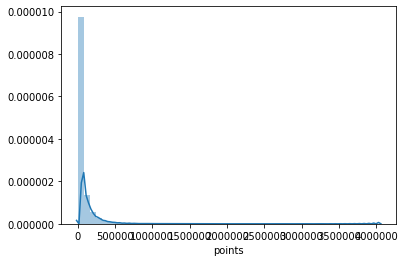

In [26]:
sns.distplot(df_InfoUser.points)

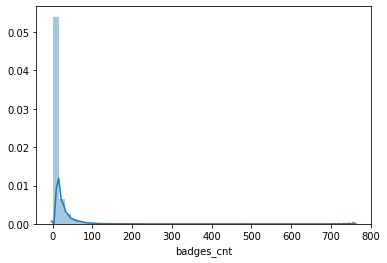

In [32]:
sns.distplot(df_InfoUser.badges_cnt)

In [29]:
sns.distplot(df_InfoUser.is_teacher_cnt)

AttributeError: 'DataFrame' object has no attribute 'is_teacher_cnt'

### 3.3 Parsing Dates

In [ ]:
for index, row in df_LogProblem.iterrows():
    row['datetime'] = datetime.strptime(row['timestamp_TW'], '%Y-%m-%d %H:%M:%S %Z')

KeyboardInterrupt: 

In [ ]:
df_LogProblem.head()

In [ ]:
# print the first few rows of the date column
print(df_LogProblem['date_TW'].head())

### Handling Categorical Variables

Next, we obtain a list of all of the categorical variables in the training data.

We do this by checking the data type (or dtype) of each column. The object dtype indicates a column has text (there are other things it could theoretically be, but that's unimportant for our purposes). For this dataset, the columns with text indicate categorical variables.

So far, we have only been working with numerical values. However, it is not
uncommon that real-world datasets contain one or more categorical feature columns.
In this section, we will make use of simple yet effective examples to see how we deal
with this type of data in numerical computing libraries.

In [21]:
# Get list of categorical variables
s = (df_InfoUser.dtypes == 'object')
object_cols = list(s[s].index)

print("df_InfoUser Categorical variables:")
print(object_cols)

# Get list of categorical variables
s = (df_InfoContent.dtypes == 'object')
object_cols = list(s[s].index)

print("df_InfoContent Categorical variables:")
print(object_cols)

# Get list of categorical variables
s = (df_LogProblem.dtypes == 'object')
object_cols = list(s[s].index)

print("df_LogProblem Categorical variables:")
print(object_cols)

df_InfoUser Categorical variables:
['uuid', 'gender', 'first_login_date_TW', 'user_city']
df_InfoContent Categorical variables:
['ucid', 'content_pretty_name', 'content_kind', 'difficulty', 'subject', 'learning_stage', 'level1_id', 'level2_id', 'level3_id', 'level4_id']
df_LogProblem Categorical variables:
['timestamp_TW', 'uuid', 'ucid', 'upid', 'is_downgrade', 'is_upgrade']


#### Label Encoding - Mapping ordinal features
To make sure that the learning algorithm interprets the ordinal features correctly,
we need to convert the categorical string values into integers. Unfortunately, there is
no convenient function that can automatically derive the correct order of the labels
of our size feature, so we have to define the mapping manually. In the following
simple example, let's assume that we know the numerical difference between
features, for example, hard = normal + 1 = easy + 2 = unset + 3.

- Info Content

In [ ]:
difficulty_mapping = {
    'easy': 1,
    'normal': 2,
    'hard': 3,
    'unset': 0
}
learning_stage_mapping = {
    'elementary': 1,
    'junior': 2,
    'senior': 3
}

In [ ]:
df_InfoContent['difficulty'] = df_InfoContent['difficulty'].map(difficulty_mapping)
df_InfoContent['learning_stage'] = df_InfoContent['learning_stage'].map(learning_stage_mapping)

In [ ]:
df_InfoContent.head()

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,NaN,math,1,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=


- Info User

### One-hot encoding - Nominal
One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.

- Info User

In [ ]:
pd.get_dummies(df_InfoUser.gender, prefix='gender').iloc[:,:-1]

,gender_female,gender_male
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0
...,...,...
72753,0,0
72754,0,0
72755,0,0
72756,1,0


In [ ]:
pd.get_dummies(df_InfoUser.user_city, prefix='user_city').iloc[:,:-1]

,user_city_chc,user_city_cy,user_city_hc,user_city_hlc,user_city_ilc,user_city_kh,user_city_kl,user_city_km,user_city_lj,user_city_ml,user_city_ntct,user_city_ntpc,user_city_phc,user_city_ptc,user_city_tc,user_city_tn,user_city_tp,user_city_ttct,user_city_ty
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72753,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
72754,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
72756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


- Log Problem

Categorical variables:
['timestamp_TW', 'uuid', 'ucid', 'upid', 'is_downgrade', 'is_upgrade']


In [18]:
pd.get_dummies(df_LogProblem.is_upgrade, prefix='is_upgrade').iloc[:,1:]

,is_upgrade_True
0,1
1,0
2,0
3,0
4,0
...,...
16217306,1
16217307,1
16217308,0
16217309,0


### Merging Datasets

In [ ]:
merge_df_LogProblem = pd.merge(df_LogProblem, df_InfoUser, on = 'uuid')
merge_df_LogProblem.head()

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
1,2019-05-06 20:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,2rJ6DLjEMKZiRtzTx7yjg+2lbHOfTfLDyNli2mFXTiA=,DlnX9mEUtmu8i56DAfwfoFGY87J8+MyQO2TZzxPYwxw=,3,1,True,31,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
2,2019-06-01 20:45:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=,axF9BHrPqRAWLRi1190T0zxKUKB8oyoXujFhFiKWUmE=,16,1,True,7,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
3,2019-06-15 20:15:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,yjaPD3QSqIl7ZCg3iPipsr9kK8Bt/cKkDOVI5tyZMW0=,11,1,True,41,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
4,2019-06-16 12:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,Cfvrgm1Xt18sIEZ4kpSnePUQfJFC6uDZ281lZ6A7m+U=,kk8BQCpwxHT4caLIqSQj4WzUz8hE8Udaa02fV3sbKW8=,12,1,True,62,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1


## Splitting Test set

A Reminder: The first prediction is to predict whether a student will make it to level 4 (Which is the level that determines if a student is proficient at the exercise). If they don't make it to level 4, we want to know what level we think they will make it too

In [ ]:
mod_df_LogProblem

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,...,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
1,2019-05-06 20:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,2rJ6DLjEMKZiRtzTx7yjg+2lbHOfTfLDyNli2mFXTiA=,DlnX9mEUtmu8i56DAfwfoFGY87J8+MyQO2TZzxPYwxw=,3,1,True,31,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
2,2019-06-01 20:45:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=,axF9BHrPqRAWLRi1190T0zxKUKB8oyoXujFhFiKWUmE=,16,1,True,7,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
3,2019-06-15 20:15:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,yjaPD3QSqIl7ZCg3iPipsr9kK8Bt/cKkDOVI5tyZMW0=,11,1,True,41,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
4,2019-06-16 12:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,Cfvrgm1Xt18sIEZ4kpSnePUQfJFC6uDZ281lZ6A7m+U=,kk8BQCpwxHT4caLIqSQj4WzUz8hE8Udaa02fV3sbKW8=,12,1,True,62,1,0,...,131366,16,2019-03-23,7,tp,1,False,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217306,2019-04-14 16:30:00 UTC,E8fJFFZyjQs5v269vJoeD0UnrbftUu8qhkjtQg1c0Zs=,TXBvUiNlr5jhR8zA+8xXAAvhjwKoxhJgVCFi6g3MkXE=,Abmm5Ye3eZw/VtKQEfUvwVxt7B7GEmrP9iiMZrXvWk0=,1,1,False,0,0,1,...,1357,0,2019-04-14,8,ty,0,False,0,0,0
16217307,2019-04-16 14:30:00 UTC,vw1aQ3xFH1p/8dileKreYvubN7nVrJQ4vsTquWAxvGM=,H9tE/axZ4DsmCfhZY9auIyxyBeXalwM2dnTvNSkhD+E=,OvRJFBLBV0NMDjJOvRLW1uMij0idXOhqlHS5KhKup7A=,2,1,True,60,1,0,...,1875,0,2019-04-16,9,ty,1,False,0,0,0
16217308,2019-05-06 21:30:00 UTC,g7XeGqv+sEyomgSQqK1MiD5qY7syNrgPpX5OYZBrC8g=,aaqqTl3AwAAh2Zu0fBTrKYA+Jgnh5Xcn3VznWez5WJU=,H+5LVP3dHsF1tuoMHH0uYM6TKMQQciQw5VI2LfwiZ38=,1,1,False,0,0,1,...,86,0,2019-05-06,11,tp,0,False,0,0,0
16217309,2019-04-08 09:00:00 UTC,4Pu17C+sQfnECIAa3jOPraAYg3BZ6Gtc+hPQx0/BPDw=,UJx6vGY4lwuup0V3VTTKZmE76AogRe5ecQHc+Yly1YM=,sw6x36H5i+khs6GWAkLEYBoRFk5YfSWhL2n2CLKVEU8=,1,1,True,80,1,0,...,75,0,2019-04-08,7,ylc,1,False,0,0,0


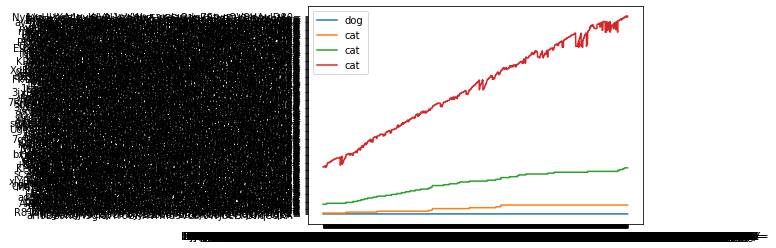

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
ax.plot(df_InfoContent['ucid'], df_InfoContent['level1_id'], label="dog")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level2_id'], label="cat")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level3_id'], label="cat")
ax.plot(df_InfoContent['ucid'], df_InfoContent['level4_id'], label="cat")
ax.legend()

plt.show()
plt.savefig('a.png')

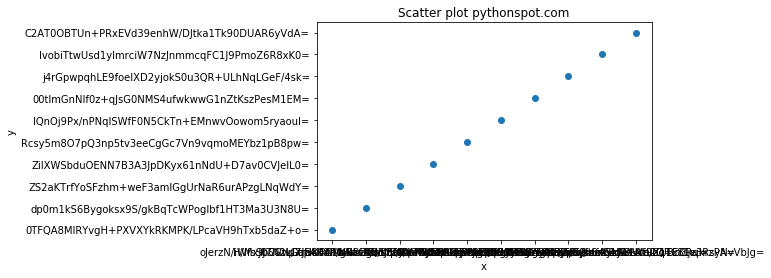

In [ ]:
plt.scatter(df_LogProblem.uuid[90:100], df_LogProblem.ucid[90:100])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
for x in df_LogProblem.uuid.unique():
    plt.plot(df_LogProblem.ucid[df_LogProblem.uuid==x])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000013DD49A43A8> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df_LogProblem.uuid.unique()

In [ ]:
df_LogProblem.ucid[df_LogProblem.uuid=="AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="]

19249       7TnOWfQ9G1fHRFFRHP2UNZ3SdWfN5I40rfh/K1ZepWc=
106078      iJ+Rpf5Qnw63bObvZLfXRBU4Hmi06Io+lXRGV9hsFgg=
142310      90InnhzKdtZM0H2+oxk5FJn/2H0Ms1RmMgi1UjxE9FI=
198809      cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=
282765      cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=
                                ...                     
16028399    o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=
16039926    Q0mRkMzFoFAkNaLsyPYFJoBmC4JdqV9riasp/YCRf/M=
16061414    o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=
16139628    flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=
16180614    flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=
Name: ucid, Length: 428, dtype: object

In [ ]:
df_LogProblem[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="]

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
19249,2019-06-21 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,7TnOWfQ9G1fHRFFRHP2UNZ3SdWfN5I40rfh/K1ZepWc=,zfX244pQp1PLL4WWGoYJJXZkvxo8MP06eycNWUtdFkQ=,2,1,False,45,5,2,True,NaN,NaN,0
106078,2018-09-27 14:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,iJ+Rpf5Qnw63bObvZLfXRBU4Hmi06Io+lXRGV9hsFgg=,yqXJXbWA2sTwsIm0dprAGSauF8q9o6qwe1Vu1JcVNtU=,5,1,False,11,2,1,True,NaN,NaN,0
142310,2018-09-27 15:15:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,90InnhzKdtZM0H2+oxk5FJn/2H0Ms1RmMgi1UjxE9FI=,e7h4n+ThBQGajZfbHu1EHBi49LtQBXdCXReSIL+I9oY=,2,1,True,33,1,0,False,NaN,NaN,0
198809,2018-09-20 15:15:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,dPpmDVG7i4Rx3/V4OPIcP7NfEwBtedFRP71/iaxDOu8=,8,1,True,63,1,0,False,NaN,NaN,0
282765,2018-08-09 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,cvnGl+iUiKphfjbPcE0G7/HRE/Q51L3w0x0WhVLy1cs=,zMNsTbk2NmOQiELRznFQbCYx0gCBCgfWSdd+Pyrmrkc=,1,1,True,22,1,0,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16028399,2019-05-02 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=,9hTTP4eKtLgCpYmwRq6PfSKD9ImD56OISUHTMLeH9HU=,13,1,False,11,1,1,True,NaN,NaN,0
16039926,2019-06-20 15:30:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,Q0mRkMzFoFAkNaLsyPYFJoBmC4JdqV9riasp/YCRf/M=,OpIAZ3xLeywyYdGXezdp9xf8mJDuYewlwGUMWEalhPI=,13,1,True,33,1,0,False,NaN,NaN,0
16061414,2019-05-02 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,o/g95+OW/vglmMGwH72w/A/K5Gc6TB/BDAHowBQDjGQ=,h4ek+3YBa/HDUJofpT4gA5cTvxWt2gpW5tHycp8RrxI=,12,1,False,20,4,1,True,NaN,NaN,0
16139628,2019-05-30 15:45:00 UTC,AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE=,flzEj3Mnu3HFWNtkqEhaKk3L6u5aBJRuGGTTmNC1DR4=,UQO3YHdVKFEIzLYqb8BRpCy4YZiv8dIRXOA6u9qWuMs=,18,1,True,22,1,0,False,NaN,NaN,1


In [ ]:
plt.scatter(df_LogProblem.uuid[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="], df_LogProblem.upid[df_LogProblem['uuid'] == "AAITw26FaJFdy0VfpYXlUhEpJnYcjEucad09AXqKmUE="])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()